## Data Analysis, Preprocessing and Scaling

### Loading the dataset

In [ ]:
import io
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['weatherAUS_dataset (2).csv']))

### Basic dataset analysis

In [ ]:
df.shape

(142193, 24)

Data has 1,42,193 entries with 24 features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No


### Encoding for the target and helper columns


In [ ]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

'RainToday'(21) and 'RainTomorrow'(23) are both of object type with Yes/No entries

In [ ]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

### Imbalanced dataset

Checking how balanced the dataset is:

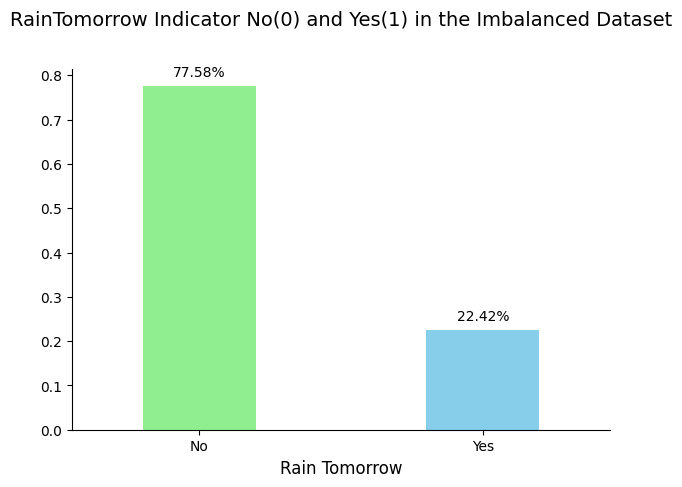

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 5))
colors = ['lightgreen', 'skyblue']

df['RainTomorrow'].value_counts(normalize=True).sort_index().plot(kind='bar', color=colors, width=0.4, rot=0, ax=ax)

ax.set_title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset', fontsize=14, y=1.1)
ax.set_xlabel('Rain Tomorrow', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_xticklabels(['No', 'Yes'], rotation=0)

sns.despine()
ax.grid(False)
plt.tight_layout()
plt.show()

The ratio of No:Yes is 78:22 indicating very imbalanced class values.

For tackling class imbalance, we will use oversampling of minority class here.

Since the size of the data set is small, undersampling of majority class would not make much sense here.

### Balancing by Resampling

In [ ]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]

yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=0)
oversampled_df = pd.concat([no, yes_oversampled])

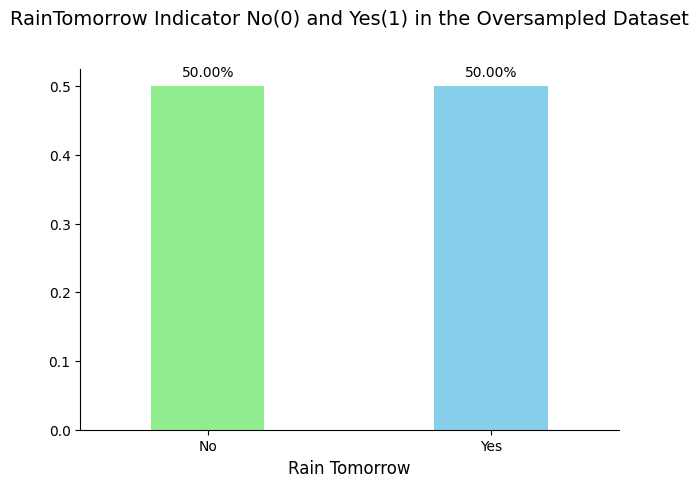

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 5))
colors = ['lightgreen', 'skyblue']

oversampled_df['RainTomorrow'].value_counts(normalize=True).sort_index().plot(kind='bar', color=colors, width=0.4, rot=0, ax=ax)

ax.set_title('RainTomorrow Indicator No(0) and Yes(1) in the Oversampled Dataset', fontsize=14, y=1.1)
ax.set_xlabel('Rain Tomorrow', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_xticklabels(['No', 'Yes'], rotation=0)

sns.despine()
ax.grid(False)
plt.tight_layout()
plt.show()

### Missing Data - decisions on dataset columns


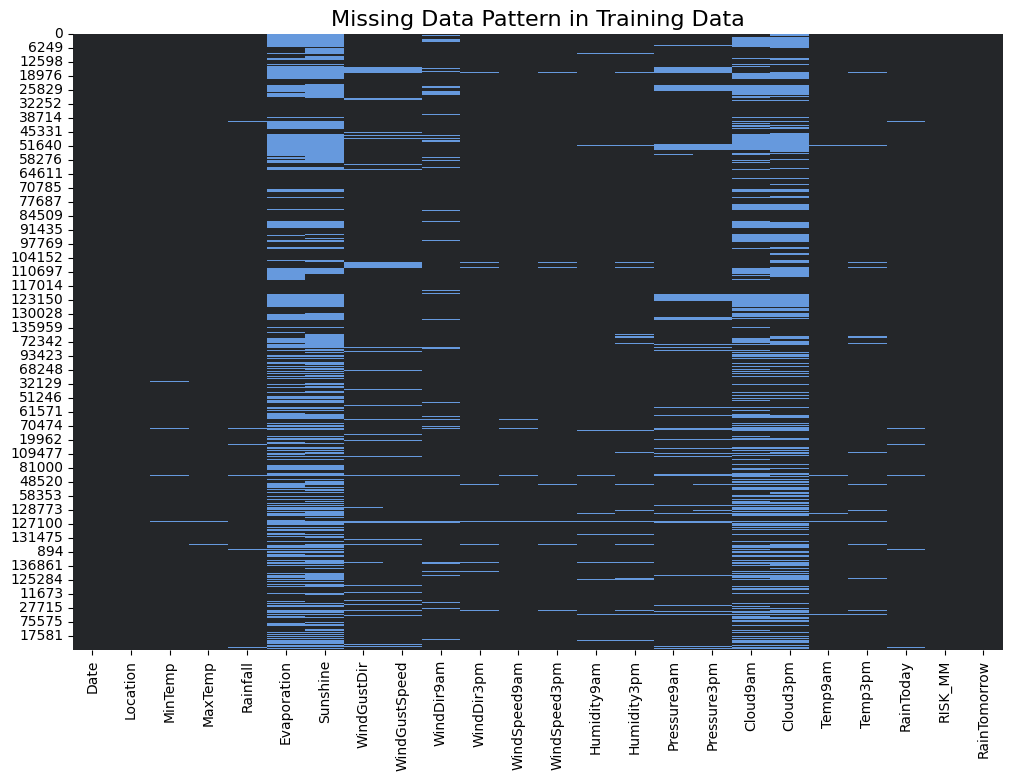

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.dark_palette("#69d", reverse=False, as_cmap=True)

plt.figure(figsize=(12, 8))
sns.heatmap(oversampled_df.isnull(), cbar=False, cmap=colors)

plt.title('Missing Data Pattern in Training Data', fontsize=16)
plt.show()

 'Evaporation','Sunshine','Cloud9am','Cloud3pm' are the features having high missing percentage.

Let's check the missing data details for these 4 features.

In [ ]:
total = oversampled_df.isnull().sum().sort_values(ascending=False)

percent = (oversampled_df.isnull().sum()/oversampled_df.isnull().count()).sort_values(ascending=False)

In [ ]:
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104956,0.475706
Evaporation,95384,0.432322
Cloud3pm,85512,0.387578
Cloud9am,81222,0.368133


Since the 4 features have less than 50% missing data; instead of completely discarding them, we have consider them in our model with proper imputation.

### Imputation

It replaces missing values with the most frequent category in each respective column, helping to maintain the distribution of the existing data and avoid introducing bias into the dataset.

In [ ]:
oversampled_df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [ ]:
# Impute categorical var with Mode
oversampled_df['Date'] = oversampled_df['Date'].fillna(oversampled_df['Date'].mode()[0])
oversampled_df['Location'] = oversampled_df['Location'].fillna(oversampled_df['Location'].mode()[0])
oversampled_df['WindGustDir'] = oversampled_df['WindGustDir'].fillna(oversampled_df['WindGustDir'].mode()[0])
oversampled_df['WindDir9am'] = oversampled_df['WindDir9am'].fillna(oversampled_df['WindDir9am'].mode()[0])
oversampled_df['WindDir3pm'] = oversampled_df['WindDir3pm'].fillna(oversampled_df['WindDir3pm'].mode()[0])

### Label Encoding for all object type columns

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled_df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled_df[col] = lencoders[col].fit_transform(oversampled_df[col])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### MICE

 Multiple Imputation by Chained Equations (MICE) using the IterativeImputer class from scikit-learn.

 MICE is a method for imputing missing data in a dataset by iteratively imputing missing values in each variable based on the observed values in the other variables.

In [ ]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

MiceImputed = oversampled_df.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled_df)

In [ ]:
MiceImputed.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.760774,7.326927,13.0,44.0,13.0,...,22.0,1007.7,1007.1,8.000000,4.868655,16.9,21.8,0.0,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.639575,11.447083,14.0,44.0,6.0,...,25.0,1010.6,1007.8,1.738298,2.633277,17.2,24.3,0.0,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.771180,12.273773,15.0,46.0,13.0,...,30.0,1007.6,1008.7,1.835819,2.000000,21.0,23.2,0.0,0.0,0.0


In [ ]:
MiceImputed.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74982,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
56315,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64522,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The MICE imputed dataframe does not have any "NaN" values.

We will now detect and discard the outliers from data set based on Inter-Quartile Range.

### Outlier Detection: Inter-Quartile Range

Outlier detection using the Interquartile Range (IQR) is a method to identify data points that deviate significantly from the majority of the data.

The IQR is a measure of statistical dispersion, and it is calculated as the difference between the third quartile (Q3) and the first quartile (Q1).

The formula for calculating the IQR is:

> **IQR = Q3−Q1**

Outliers are typically defined as data points that fall below
Q3+1.5×IQR.

This is a common rule of thumb, but the multiplier (1.5 in this case) can be adjusted based on the level of stringency desired.

Here's a step-by-step explanation of outlier detection using the IQR:

1. Calculate Quartiles (Q1 and Q3):


> Q1 is the median of the lower half of the dataset.

> Q3 is the median of the upper half of the dataset.

2. Calculate the IQR:

> IQR is the difference between Q3 and Q1.

3. Identify Outliers:

> Outliers are defined as values below

4. Mark or Remove Outliers:

> You can mark or remove the identified outliers based on your analysis or modeling needs.







In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1534.250000
Location           25.000000
MinTemp             9.200000
MaxTemp            10.300000
Rainfall            2.400000
Evaporation         4.110837
Sunshine            5.913262
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.127353
Pressure9am         8.788873
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.675052
Temp9am             9.300000
Temp3pm             9.826766
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [ ]:
# Removing outliers from dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(157053, 24)

<Axes: >

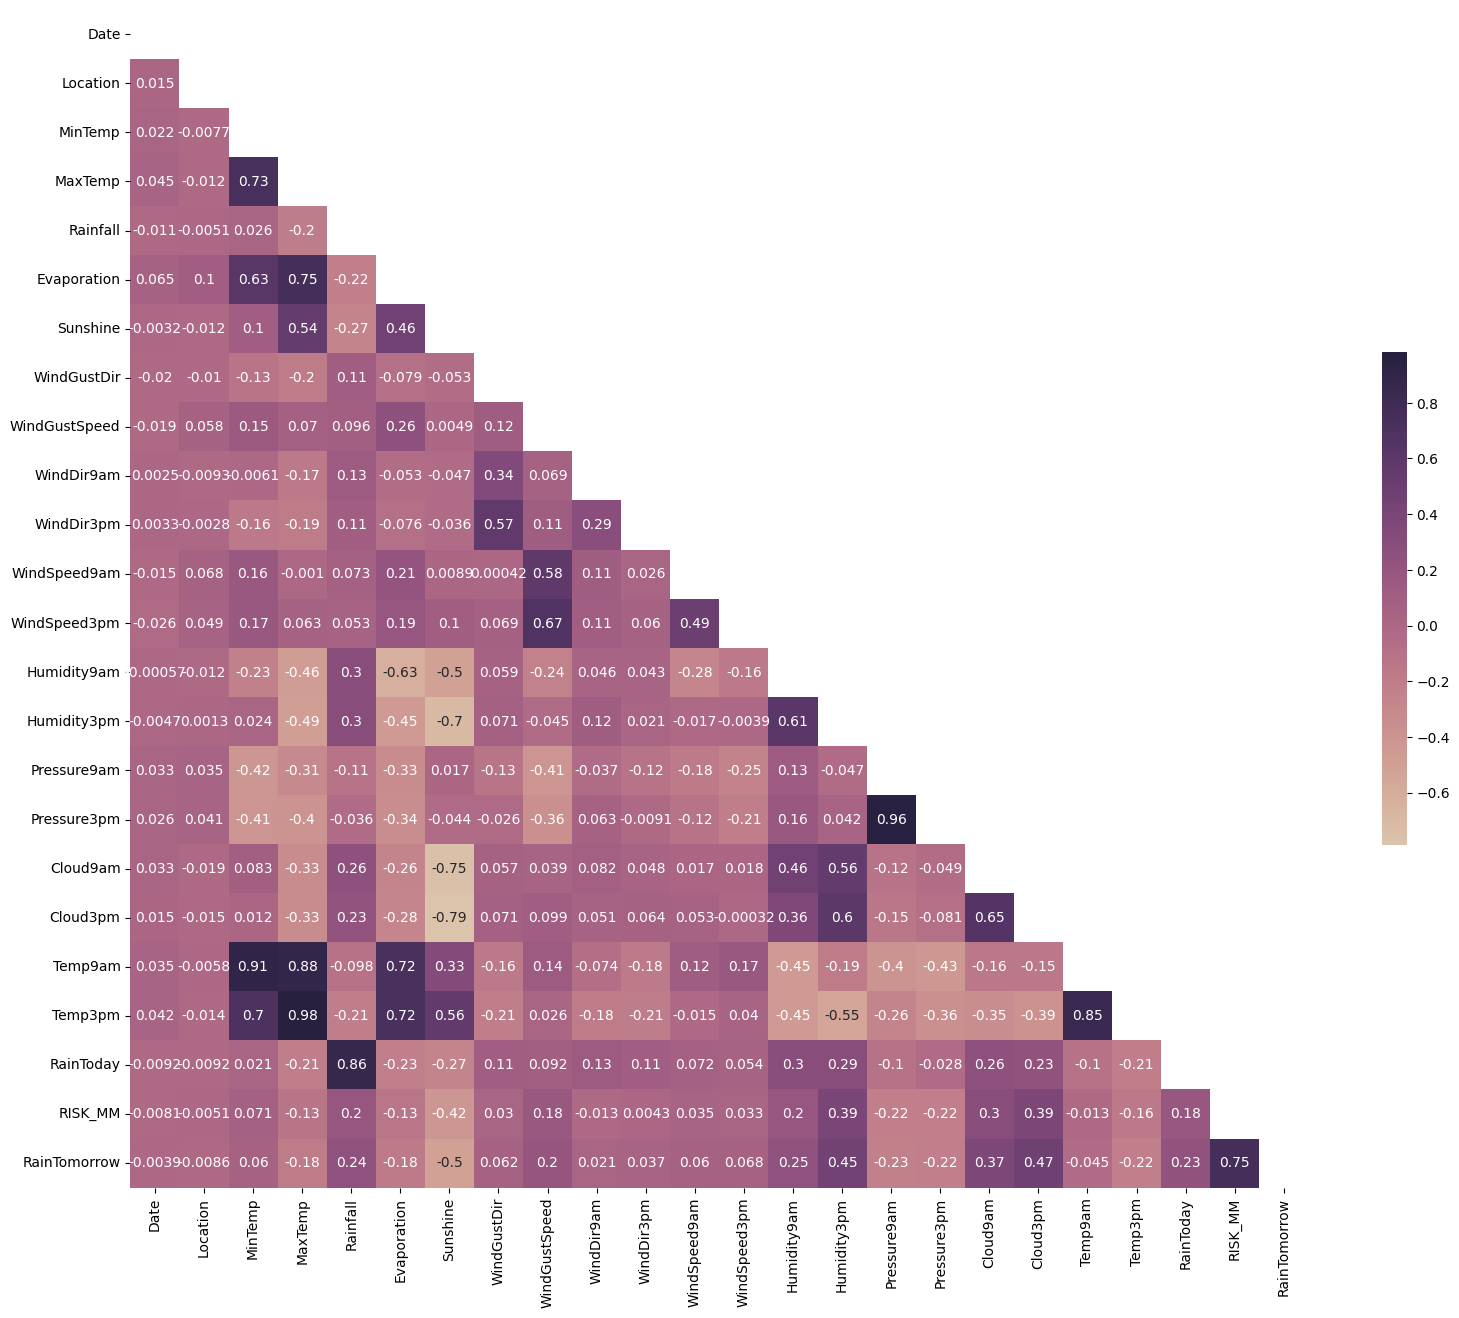

In [ ]:
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(19, 16))
cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, cbar_kws={"shrink": .4})

The following pairs of features are having high correlation between them:

>MaxTemp and MinTemp

>Pressure9am and Pressure3pm

>Temp9am and Temp3pm

>Evaporation and MaxTemp

>MaxTemp and Temp3pm

But in no case, the correlation value is equal to a perfect "1".

So we are not discarding any feature.

Pairwise correlation among these highly correlated features


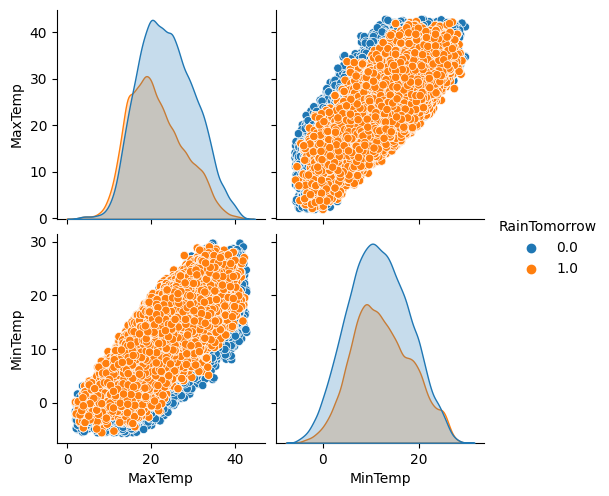

In [ ]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp'), hue='RainTomorrow' )

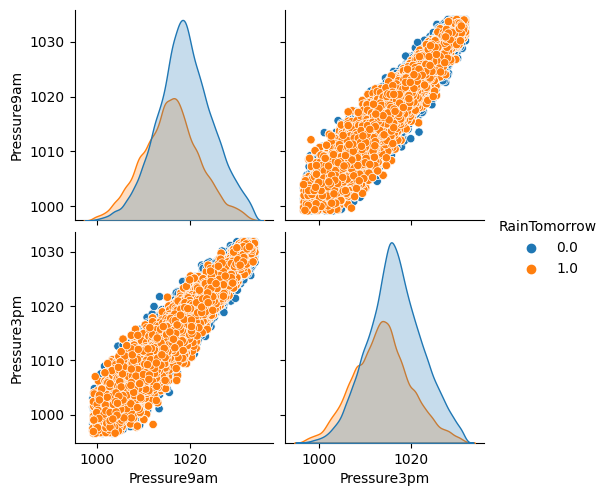

In [ ]:
sns.pairplot( data=MiceImputed, vars=('Pressure9am','Pressure3pm'), hue='RainTomorrow' )

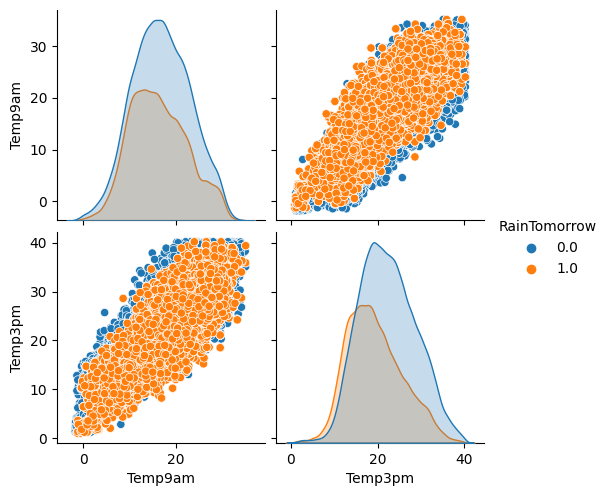

In [ ]:
sns.pairplot( data=MiceImputed, vars=('Temp9am','Temp3pm'), hue='RainTomorrow' )

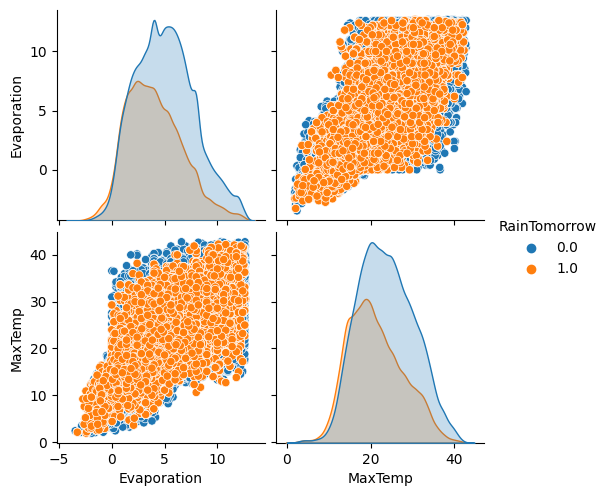

In [ ]:
sns.pairplot( data=MiceImputed, vars=('Evaporation','MaxTemp'), hue='RainTomorrow' )

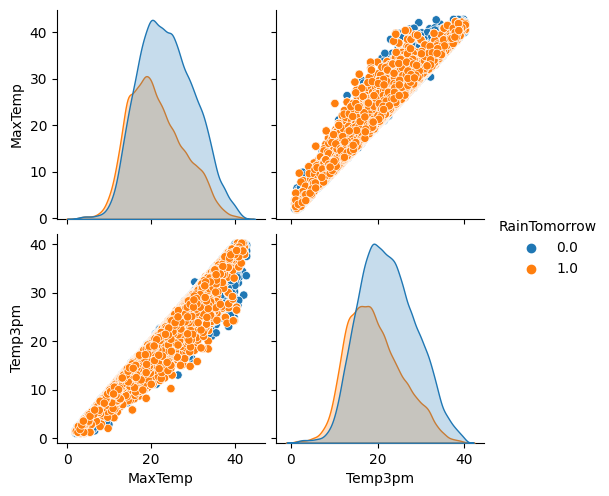

In [ ]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','Temp3pm'), hue='RainTomorrow' )

Each of the pairplots shows very clearly distinguishable clusters of RainTomorrow "yes" and "no".

There is very minimal overlap between them.

### Data standardization

We are using MinMaxScaler instead of StandardScaler in order to avoid negative values.

In [ ]:
from sklearn import preprocessing

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)

modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.115284,0.041667,0.540381,0.523629,0.021387,0.066385,0.564054,0.866667,0.281340,0.866667,...,0.438457,0.449587,0.4800,0.842673,0.475942,0.508439,0.522073,0.230082,0.000000,0.0
1,0.115575,0.041667,0.405858,0.565217,0.019802,0.065572,0.733240,0.933333,0.281340,0.400000,...,0.453670,0.497521,0.4912,0.354839,0.300622,0.514768,0.570058,0.230082,0.000000,0.0
2,0.115866,0.041667,0.529171,0.576560,0.019802,0.079865,0.767187,1.000000,0.296147,0.866667,...,0.479026,0.447934,0.5056,0.362436,0.250954,0.594937,0.548944,0.230082,0.000000,0.0
3,0.116157,0.041667,0.446215,0.620038,0.019802,0.067942,0.743541,0.266667,0.133266,0.600000,...,0.408029,0.613223,0.5712,0.317572,0.261666,0.533755,0.612284,0.230082,0.002695,0.0
4,0.116448,0.041667,0.632305,0.701323,0.022444,0.073672,0.497815,0.866667,0.259129,0.066667,...,0.494240,0.500826,0.4624,0.764765,0.721534,0.527426,0.673704,0.230082,0.000539,0.0


### Filter Method

* The chi-square (
χ
2
 ) statistical test is a method used for feature selection in the context of classification tasks.

* The chi-square test assesses the independence between categorical variables.

* The context of feature selection, it helps identify the features that are most relevant to the target variable.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)

X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


###  Wrapper Method (Random Forest):


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)

support = selector.get_support()
features = X.loc[:,support].columns.tolist()

print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00215298 0.00227962 0.0028516  0.00377597 0.01033663 0.00267484
 0.06108646 0.00154023 0.00711242 0.00175296 0.00171082 0.00156223
 0.00200382 0.00726999 0.03263553 0.00831995 0.0142519  0.02028333
 0.05112533 0.00295545 0.00538457 0.00359086 0.7533425 ]


* This is quite interesting to see all feature importances except for RISK_MM are nearing to zero.

* This is possible in two scenarios.

> Either when all the features have high correlation among each other OR

> when the features actually have very very low relative feature importances w.r.t. the target variable.

* Since we already plotted correlation, we know that the first possibility is not true.

* We will cross-check if the second possibility is true by using Permutation Importance.

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)

In [ ]:
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.4753 ± 0.0017,RISK_MM
0 ± 0.0000,MaxTemp
0 ± 0.0000,Rainfall
0 ± 0.0000,Evaporation
0 ± 0.0000,Sunshine
0 ± 0.0000,WindGustDir
0 ± 0.0000,WindGustSpeed
0 ± 0.0000,WindDir9am
0 ± 0.0000,WindDir3pm
0 ± 0.0000,Cloud3pm


* We can observe that all features except "RISK_MM" have very very low relative importance (all nearing to zero) with respect to target variable "RainTomorrow".

* As explained by the dataset creator Joe Young, "RISKMM is the amount of rainfall in millimeters for the next day.

* It includes all forms of precipitation that reach the ground, such as rain, drizzle, hail and snow.

* And it was the column that was used to actually determine whether or not it rained to create the binary target.


In [ ]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]

target = MiceImputed['RainTomorrow']

> Since it contains information directly about the target variable, including it would leak the future information to our model" (Quoted from his comment).

> So "RISK_MM" is excluded from the model.

> "Date" is also excluded from the model for the obvious reason since it is not adding any relevance in the current context.

## Train - Test Split

Training(80%) and Test(20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

Normalizing the features - X

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Comparision Metrics and Helper Functions


### ROC curve
 a graphical representation of the trade-off between true positive rate and false positive rate at various thresholds for the model.

In [ ]:
def plot_roc_cur(fper, tper, fs):
    plt.figure(figsize=fs)
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Sklearn Metrics
* #### Accuracy score:
> Measures the fraction of correctly predicted instances out of the total predictions, indicating overall model accuracy.

* #### Roc AUC(Area Under the Curve) score
>Represents the Area Under the Receiver Operating Characteristic curve, providing a measure of a model's ability to distinguish between classes.
* #### Cohen Kappa Score
>Quantifies the agreement between predicted and actual labels, accounting for chance agreement beyond what would be expected by random chance.
* #### Plot confusion matrix
> Visualizes the true positive, true negative, false positive, and false negative predictions, aiding in the assessment of a model's performance across different classes.


* #### Roc curve
>Graphical representation of the trade-off between true positive rate and false positive rate, illustrating a model's discriminatory power across different probability thresholds.
* #### Classification report
> Summarizes precision, recall, F1-score, and support for each class, providing a comprehensive evaluation of a model's performance on a multi-class classification problem.

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def run_model(model, X_train, y_train, X_test, y_test, verbose=True,figsize=(6, 4)):
    t0 = time.time()
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0
    print("--------------------------------------------"
    print("ACCURACY:       {}".format(accuracy))
    print("--------------------------------------------")
    print("ROC AUC:        {}".format(roc_auc))
    print("--------------------------------------------")
    print("COHEN'S KAPPA:  {}".format(coh_kap))
    print("--------------------------------------------")
    print("TIME TAKEN:     {}".format(time_taken))
    print("--------------------------------------------")
    print("CLASSIFICATION REPORT: ")
    print(classification_report(y_test, y_pred, digits=5))
    print("--------------------------------------------")

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper, figsize)

    # Display confusion matrix with percentages
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = (cm / cm.sum()) * 100  # Express as percentages of the total count
    plt.figure(figsize=figsize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, values_format=".2f")
    plt.show()

    return model, accuracy, roc_auc, coh_kap, time_taken

In [ ]:
from IPython.display import HTML, display

## Model-1: Naive Bayes -> 74.6%

--------------------------------------------
ACCURACY:       0.7463309031867817
--------------------------------------------
ROC AUC:        0.7390681699068391
--------------------------------------------
COHEN'S KAPPA:  0.4739183153847101
--------------------------------------------
TIME TAKEN:     0.10039210319519043
--------------------------------------------
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

         0.0    0.80042   0.77364   0.78680     19005
         1.0    0.67014   0.70450   0.68689     12406

    accuracy                        0.74633     31411
   macro avg    0.73528   0.73907   0.73685     31411
weighted avg    0.74897   0.74633   0.74734     31411

--------------------------------------------


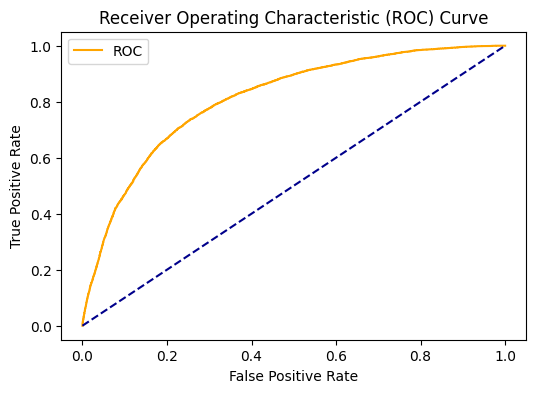

<Figure size 600x400 with 0 Axes>

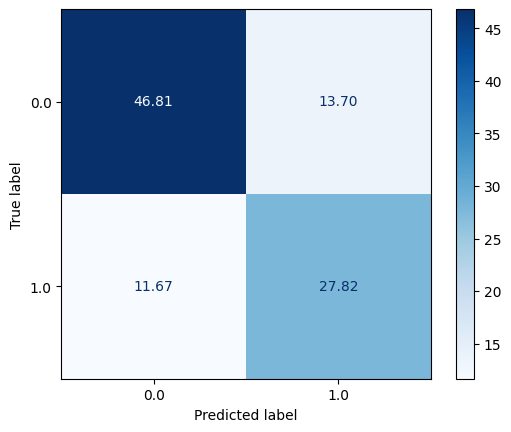

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

display(HTML("<h1 style='font-size:24px;'>RAINFALL PREDICTION USING Naive Bayes</h1>"))

model_naive_bayes, accuracy_naive_bayes, roc_auc_naive_bayes, coh_kap_naive_bayes, tt_naive_bayes = run_model(naive_bayes_model, X_train, y_train, X_test, y_test)

## Model-2: Logistic Regression with penalty L1(Lasso Regression) -> 78.6%

--------------------------------------------
ACCURACY:       0.7868581070325682
--------------------------------------------
ROC AUC:        0.7675774165847139
--------------------------------------------
COHEN'S KAPPA:  0.5454519811756883
--------------------------------------------
TIME TAKEN:     4.134637355804443
--------------------------------------------
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

         0.0    0.80240   0.85935   0.82990     19005
         1.0    0.75825   0.67580   0.71466     12406

    accuracy                        0.78686     31411
   macro avg    0.78033   0.76758   0.77228     31411
weighted avg    0.78496   0.78686   0.78438     31411

--------------------------------------------


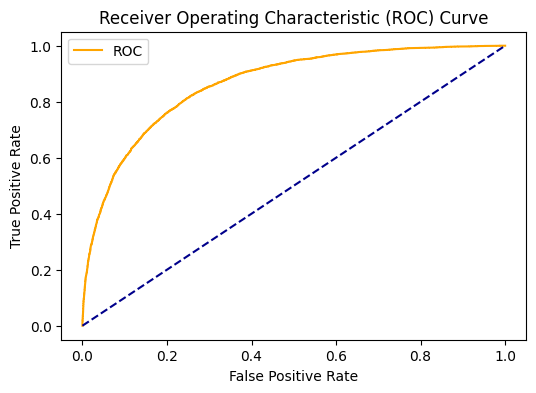

<Figure size 600x400 with 0 Axes>

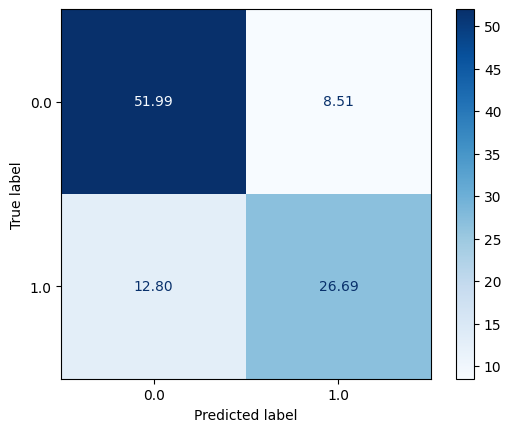

In [ ]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}
# Set the font size to 24px using HTML
display(HTML("<h1 style='font-size:24px;'>RAINFALL PREDICTION USING LOGISTIC REGRESSION</h1>"))

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

##Model-3: KNN -> 84.3%

--------------------------------------------
ACCURACY:       0.8430167775620006
--------------------------------------------
ROC AUC:        0.8468726570720526
--------------------------------------------
COHEN'S KAPPA:  0.6786727948260026
--------------------------------------------
TIME TAKEN:     25.563851594924927
--------------------------------------------
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

         0.0    0.90401   0.82852   0.86462     19005
         1.0    0.76710   0.86523   0.81321     12406

    accuracy                        0.84302     31411
   macro avg    0.83555   0.84687   0.83892     31411
weighted avg    0.84993   0.84302   0.84432     31411

--------------------------------------------


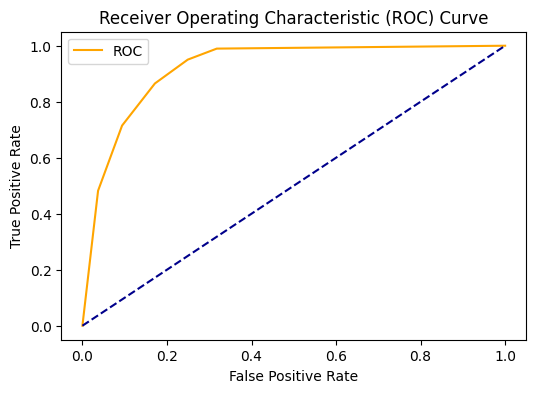

<Figure size 600x400 with 0 Axes>

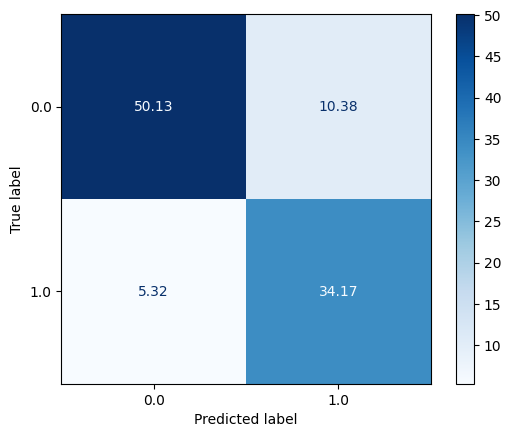

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

display(HTML("<h1 style='font-size:24px;'>RAINFALL PREDICTION USING K-NEAREST NEIGHBOURS - KNN</h1>"))

model_knn, accuracy_knn, roc_auc_knn, coh_kap_knn, tt_knn = run_model(knn_model, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
y_pred_svc = svc_model.predict(X_test)

display(HTML("<h1 style='font-size:24px;'>RAINFALL PREDICTION USING SUPPORT VECTOR CLASSIFICATION - SVC</h1>"))

model_svc, accuracy_svc, roc_auc_svc, coh_kap_svc, tt_svc = run_model(svc_model, X_train, y_train, X_test, y_test)

## Model-4: Decision Tree -> 85.9%

--------------------------------------------
ACCURACY:       0.8596351596574449
--------------------------------------------
ROC AUC:        0.8565055807411805
--------------------------------------------
COHEN'S KAPPA:  0.7082635096511085
--------------------------------------------
TIME TAKEN:     0.5093252658843994
--------------------------------------------
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

         0.0    0.89393   0.87140   0.88252     19005
         1.0    0.81032   0.84161   0.82567     12406

    accuracy                        0.85964     31411
   macro avg    0.85213   0.85651   0.85410     31411
weighted avg    0.86091   0.85964   0.86007     31411

--------------------------------------------


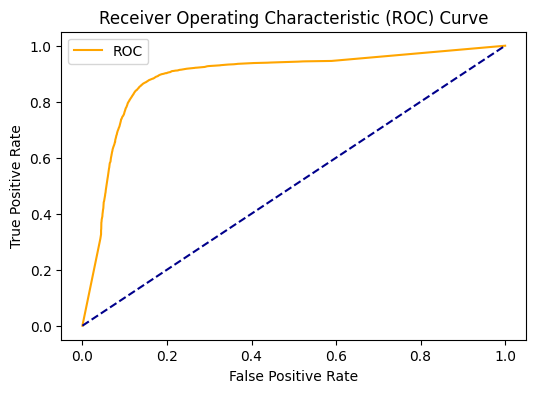

<Figure size 600x400 with 0 Axes>

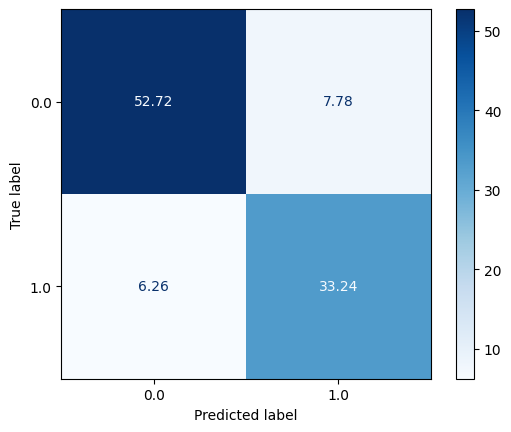

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

display(HTML("<h1 style='font-size:24px;'>RAINFALL PREDICTION USING DECISION TREE</h1>"))

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

## Model-5: Multi Layer Perceptron - Neural Networks (MLP) -> 88.4%

--------------------------------------------
ACCURACY:       0.8840215211231734
--------------------------------------------
ROC AUC:        0.8785054082893838
--------------------------------------------
COHEN'S KAPPA:  0.7572545517542678
--------------------------------------------
TIME TAKEN:     357.0126848220825
--------------------------------------------
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

         0.0    0.90367   0.90476   0.90421     19005
         1.0    0.85383   0.85225   0.85304     12406

    accuracy                        0.88402     31411
   macro avg    0.87875   0.87851   0.87863     31411
weighted avg    0.88399   0.88402   0.88400     31411

--------------------------------------------


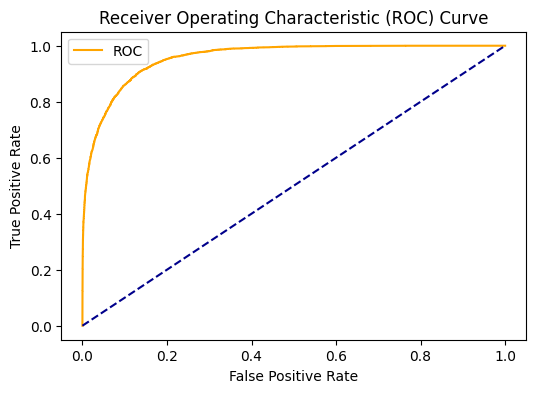

<Figure size 600x400 with 0 Axes>

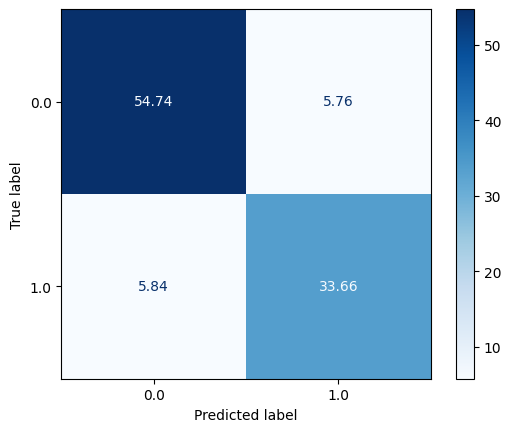

In [ ]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}
display(HTML("<h1 style='font-size:24px;'>RAINFALL PREDICTION USING MLP</h1>"))
model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

## Model-6: Random Forest -> 93% - better time

--------------------------------------------
ACCURACY:       0.9301836936105186
--------------------------------------------
ROC AUC:        0.92991977810467
--------------------------------------------
COHEN'S KAPPA:  0.8547796435518091
--------------------------------------------
TIME TAKEN:     36.96583294868469
--------------------------------------------
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

         0.0    0.95237   0.93118   0.94166     19005
         1.0    0.89804   0.92866   0.91310     12406

    accuracy                        0.93018     31411
   macro avg    0.92521   0.92992   0.92738     31411
weighted avg    0.93092   0.93018   0.93038     31411

--------------------------------------------


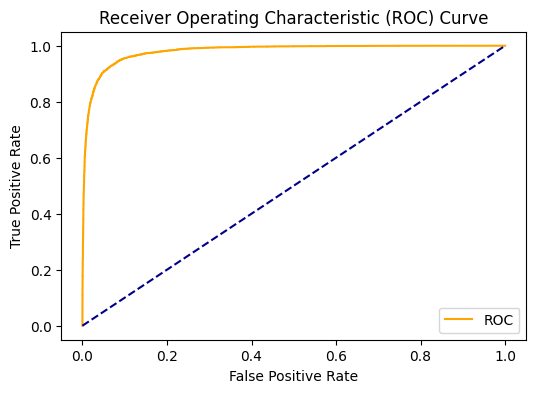

<Figure size 600x400 with 0 Axes>

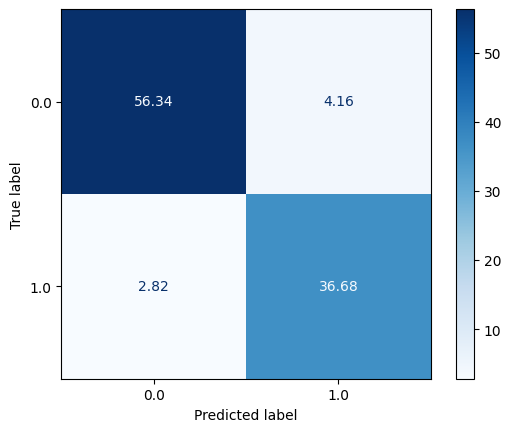

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}
display(HTML("<h1 style='font-size:24px;'>RAINFALL PREDICTION USING RANDOM FOREST</h1>"))
model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

## Model-7: eXtreme Gradient Boosting -> 93% - better ROC AUC

--------------------------------------------
ACCURACY:       0.9305975613638534
--------------------------------------------
ROC AUC:        0.9342501440880143
--------------------------------------------
COHEN'S KAPPA:  0.8567505297068896
--------------------------------------------
TIME TAKEN:     72.64807438850403
--------------------------------------------
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

         0.0    0.96671   0.91686   0.94113     19005
         1.0    0.88197   0.95164   0.91548     12406

    accuracy                        0.93060     31411
   macro avg    0.92434   0.93425   0.92830     31411
weighted avg    0.93324   0.93060   0.93100     31411

--------------------------------------------


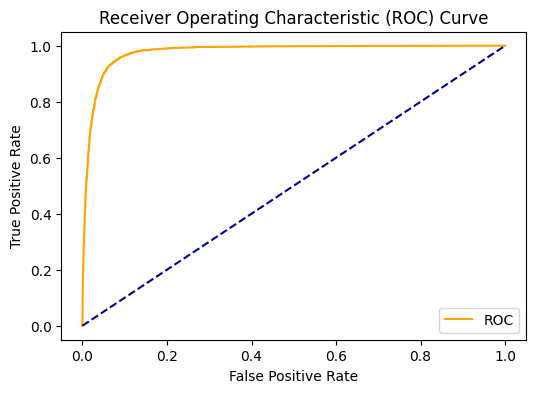

<Figure size 600x400 with 0 Axes>

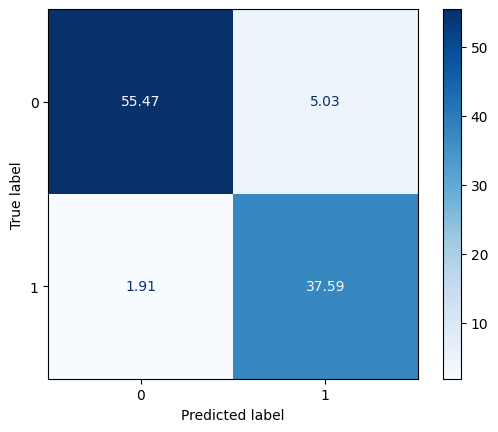

In [ ]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}
display(HTML("<h1 style='font-size:24px;'>RAINFALL PREDICTION USING eXTREME GRADIENT BOOSTING -XGBoost</h1>"))
model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

## Comparing the models

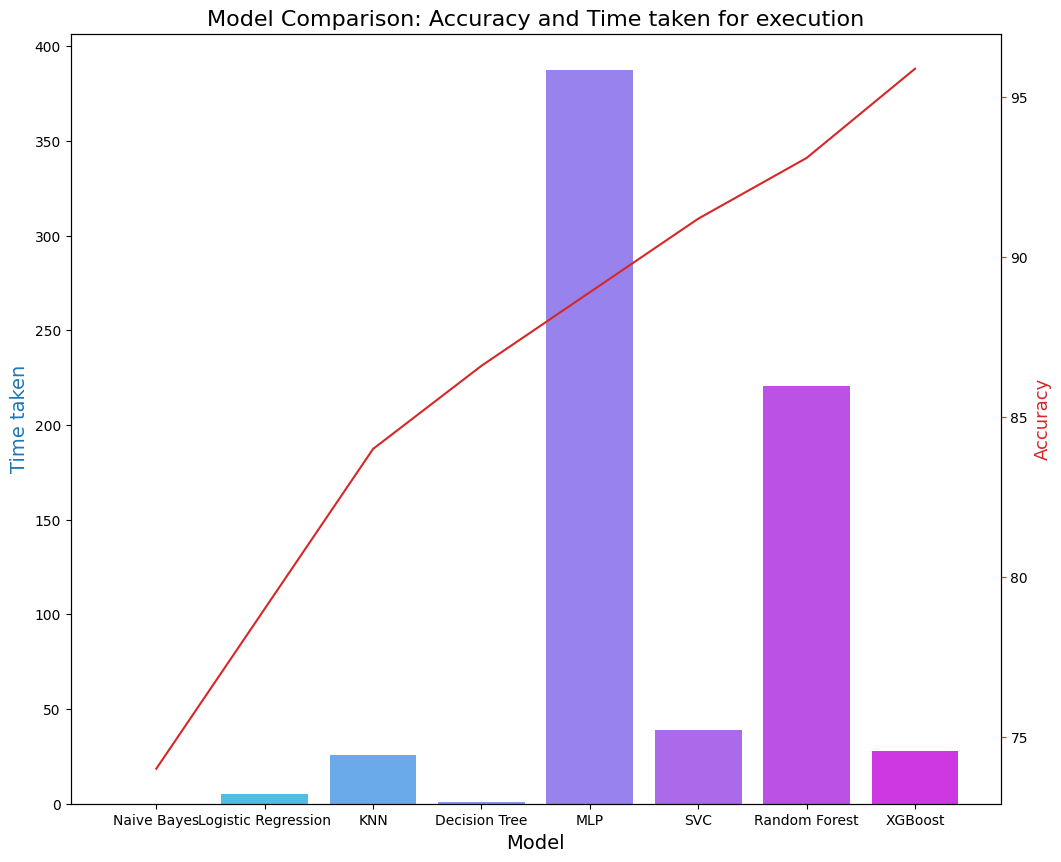

In [ ]:
accuracy_scores = [74, 79, 84,86.6,88.9,91.2,93.1,95.89]
tt = [0.1, 5.32,25.5,0.74,387.32,38.87,220.5,28.0]

model_data = {'Model': ['Naive Bayes','Logistic Regression','KNN','Decision Tree','MLP','SVC','Random Forest','XGBoost'],
              'Accuracy': accuracy_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))

ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=16)
color = 'tab:blue'

ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)

ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='cool')

ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)

ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)